In [1]:
from tensorflow.keras.datasets import imdb

(train_input, train_target),(test_input,test_target) = imdb.load_data(num_words=500)
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [2]:
print(len(train_input[0])) # 첫번째 리뷰 길이

218


In [3]:
print(len(train_input[1]))

189


In [4]:
print(train_input)

[list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 

In [5]:
print(train_target[:20])
# 리뷰가 긍정(1)인지 부정(0)인지

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split

train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size=0.2,random_state=42)

In [7]:
import numpy as np

lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


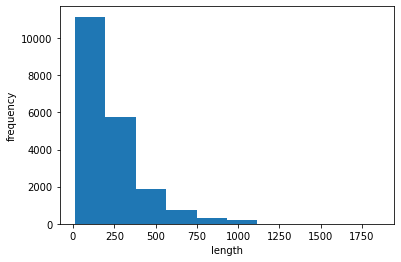

In [8]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input,maxlen=100) # 시퀀스 데이터의 길이를 100으로 맞춤
print(train_seq.shape) # 2차원 배열로 변환

(20000, 100)


In [10]:
print(train_seq[0]) # 뒤에 0이 없음-> 원본 데이터가 100보다 길었음

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [11]:
print(train_input[0][-10:]) # 뒷 부분은 일치-> 앞부분이 잘렸음

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [12]:
print(train_seq[5]) # 샘플의 길이가 100 미만이었음

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [13]:
val_seq = pad_sequences(val_input,maxlen=100) # 검증세트 길이 100으로 맞춤

In [14]:
# 순환 신경망 만들기
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [15]:
train_oh = keras.utils.to_categorical(train_seq) # train_seq를 원-핫 인코딩으로 변환
print(train_oh.shape)

(20000, 100, 500)


In [16]:
print(train_oh[0][0][:12]) # 첫번째 토근 10의 인코딩

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [17]:
print(np.sum(train_oh[0][0]))

1.0


In [18]:
val_oh = keras.utils.to_categorical(val_seq) # 검증 세트 원-핫 인코딩

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 순환 신경망 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # RMSprop 객체를 만들어 학습률을 0.0001로 지정
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh,train_target,epochs=100,batch_size=64,validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 40ms/step - loss: 0.6994 - accuracy: 0.5013 - val_loss: 0.6955 - val_accuracy: 0.5072
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6945 - accuracy: 0.5084 - val_loss: 0.6936 - val_accuracy: 0.5054
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6920 - accuracy: 0.5188 - val_loss: 0.6924 - val_accuracy: 0.5140
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6901 - accuracy: 0.5311 - val_loss: 0.6912 - val_accuracy: 0.5212
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6881 - accuracy: 0.5432 - val_loss: 0.6899 - val_accuracy: 0.5244
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6862 - accuracy: 0.5541 - val_loss: 0.6887 - val_accuracy: 0.5292
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6843 - accuracy: 0.5602 - val_loss: 0.6878 - val_ac

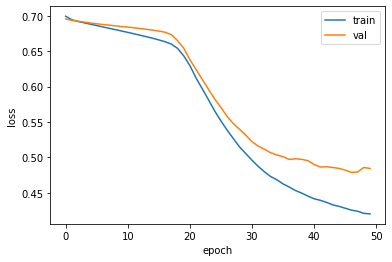

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [22]:
print(train_seq.nbytes, train_oh.nbytes) # 입력 데이터가 500배 커짐(원-핫 인코딩의 단점)

8000000 4000000000


In [23]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100)) # 단어 임베딩
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# 원-핫 인코딩과 비슷한 성능, 순환층의 가중치 수 감소, 훈련 세트 크기 감소